In [1]:
import requests
import requests.auth
import time
import praw # Guidance for utilizing PRAW and Reddit API's from Felippe Rodrigues http://www.storybench.org/how-to-scrape-reddit-with-python/
import pandas as pd
import datetime as dt
from requests import session

In [2]:
reddit = praw.Reddit(client_id='lx_lyM4sobJKGg',
                     client_secret='O5hSYfMlTDWUTCm5Dmi4zX3Zx64',
                     user_agent='<Python>:<General Assembly DSI; app for subreddits classification>:<v0.1> (by /u/<DiffuseSingularity>)',
                     username='DiffuseSingularity')

In [3]:
Futurology = reddit.subreddit('Futurology')
Worldnews = reddit.subreddit('Worldnews')

In [4]:
#for submission in Futurology.top(limit=1000):
 #   print(submission.title, submission.id)

In [5]:
# authors_Fut = []
# titles_Fut = []
# for submission in Futurology.top(limit=1000):
#     print(submission.author, submission.title)
#     authors_Fut.append(submission.author)
#     titles_Fut.append(submission.title)

In [6]:
dict_world = { "title":[],
               #"author":[],
                "score":[],
                "url":[]
                #"id":[], 
                }
for submission in Worldnews.hot(limit=1000):
    dict_world["title"].append(submission.title)
    #try:
    #topics_dict_world["author"].append(submission.author)
    #except:
 #   topics_dict_world["author"]
    dict_world["score"].append(submission.score)
    dict_world["url"].append(submission.url)
    #topics_dict_world["id"].append(submission.id)
    #topics_dict_world["body"].append(submission.selftext)

In [7]:
dict_fut = { "title":[],
               #"author":[],
            "score":[],
            "url":[]
                }
for submission in Futurology.hot(limit=1000):
    #try: 
        dict_fut["title"].append(submission.title)
    #except:
      #  topics_dict_fut["title"] = None
   # try: 
    #    topics_dict_fut["author"].append(submission.author.name)
    #except:
    #    topics_dict_fut["author"] = None #learned with Brendan Connolly that author draws from reddit even when these become dict objects, and if someone potentially deleted an account, that could trip things up.
    #try: 
        dict_fut["score"].append(submission.score)
    #except:
     #   topics_dict_fut["score"] = None
        dict_fut["url"].append(submission.url)

    #try: 
    #    topics_dict_fut["url"].append(submission.url)
    #except:
       # topics_dict_fut["url"] = None
    #topics_dict_fut["body"].append(submission.selftext)

In [8]:
print(dict_world)

{'title': ["A giant Trump baby blimp that the president says makes him 'feel unwelcome' is following him to London this summer — and could be 5 times as big", "Rotten eggs: e-waste from Europe poisons Ghana's food chain - Toxins from old computers, fridges and other electronic goods are polluting chicken eggs in an area where 80,000 people live", 'Japan apologises to people forcibly sterilised under defunct eugenics law - Survivors will get payouts of 3.2m yen each for policy aimed at ‘preventing birth of poor-quality descendants’', 'The U.S. government is targeting immigration lawyers, activists, and reporters at the Mexico border, a leaked Homeland Security database confirms.', 'Greenland lost roughly half its sea ice in just 8 years (2010-2018)', 'China And Turkey Defy US, Will Continue To Import Iran Oil', 'Twitter shuts down 5,000 pro-Trump bots retweeting anti-Mueller report invective | Ars Technica', 'Saudi Arabia beheads 37 mostly Shiite citizens, displays executed body', 'Dutc

In [9]:
type(dict_fut)

dict

In [10]:
dict_fut

{'title': ["r/Futurology's Official Discord - A relaxed place to chill and discuss all things Futurology.",
  'Researchers Create ‘First-of-its-Kind’ Roadmap for Saving Earth From Climate Change Years Before 2050 Deadline',
  'UK Environment secretary promises tougher action after Greta Thunberg speech. “Thanks to the leadership of Greta and others” it has “become inescapable that we have to act”',
  'A Excavator Operator at Bauma in Germany digging at a jobsite in South Korea!',
  'Nevada passes bill for 50% renewables by 2030, 100% carbon free by 2050',
  'Research shows psilocybin — a Schedule I narcotic — to be of great help to cancer patients with end-of-life problems',
  "UPS will start using Toyota's zero-emission hydrogen semi trucks",
  "Elon Musk says Tesla owners could make up to $30,000 a year turning their cars into 'robotaxis'",
  'Ford invests $500 million in electric car startup Rivian',
  'Generating 100% of the world’s energy from solar panels, wind power, hydropower 

In [11]:
#topics_dict_fut.pop('author')

In [12]:
future_df = pd.DataFrame(dict_fut)

In [13]:
future_df.shape

(922, 3)

In [14]:
world_df = pd.DataFrame(dict_world)

In [15]:
world_df.shape

(535, 3)

In [16]:
future_df.head()

,title,score,url
0,r/Futurology's Official Discord - A relaxed pl...,326,https://discordapp.com/invite/JtaYWC3
1,Researchers Create ‘First-of-its-Kind’ Roadmap...,6835,https://www.goodnewsnetwork.org/first-of-its-k...
2,UK Environment secretary promises tougher acti...,211,https://www.theweek.co.uk/100879/gove-promises...
3,A Excavator Operator at Bauma in Germany diggi...,51,https://gfycat.com/ObviousSizzlingBoutu
4,"Nevada passes bill for 50% renewables by 2030,...",12293,https://www.utilitydive.com/news/nevada-passes...


In [17]:
dict_fut.keys()

dict_keys(['title', 'score', 'url'])

In [18]:
dict_world.keys()

dict_keys(['title', 'score', 'url'])

In [19]:
world_df = pd.DataFrame(dict_world)

In [20]:
world_df.head()

,title,score,url
0,A giant Trump baby blimp that the president sa...,22113,https://www.businessinsider.com/trump-baby-bli...
1,Rotten eggs: e-waste from Europe poisons Ghana...,2069,https://www.theguardian.com/global-development...
2,Japan apologises to people forcibly sterilised...,2318,https://www.theguardian.com/world/2019/apr/24/...
3,The U.S. government is targeting immigration l...,885,https://bostonreview.net/global-justice/lauren...
4,Greenland lost roughly half its sea ice in jus...,1042,https://www.theatlantic.com/science/archive/20...


In [21]:
future_df.head()

,title,score,url
0,r/Futurology's Official Discord - A relaxed pl...,326,https://discordapp.com/invite/JtaYWC3
1,Researchers Create ‘First-of-its-Kind’ Roadmap...,6835,https://www.goodnewsnetwork.org/first-of-its-k...
2,UK Environment secretary promises tougher acti...,211,https://www.theweek.co.uk/100879/gove-promises...
3,A Excavator Operator at Bauma in Germany diggi...,51,https://gfycat.com/ObviousSizzlingBoutu
4,"Nevada passes bill for 50% renewables by 2030,...",12293,https://www.utilitydive.com/news/nevada-passes...


In [22]:
future_df['subreddit'] = "/r/futurology" 

In [23]:
world_df['subreddit'] = "/r/worldnews"

In [24]:
#The prior columns were created for training and testing the data for subreddit classification 
df = pd.concat([world_df, future_df], axis=0, sort = True) 


In [25]:
df.sort_values(['score'])

,score,subreddit,title,url
175,0,/r/futurology,I just had a maybe good idea,https://www.reddit.com/r/Futurology/comments/b...
490,0,/r/worldnews,Bytedance says TikTok ban in India causing $50...,https://timesofindia.indiatimes.com/business/i...
724,0,/r/futurology,Ford taps brakes on self-driving cars.,https://www.wired.com/story/ford-taps-brakes-a...
725,0,/r/futurology,$80 billion has been spent on self-driving car...,https://www.treehugger.com/cars/praise-dumb-tr...
124,0,/r/futurology,Novums!,https://www.reddit.com/r/Futurology/comments/b...
492,0,/r/worldnews,VavaCars revolutionises the way 'used cars' ar...,https://tribune.com.pk/story/1956442/8-vavacar...
493,0,/r/worldnews,Trump to make first state visit to UK in June,https://www.independent.co.uk/news/uk/politics...
742,0,/r/futurology,Five policies to deal with the loss of jobs to...,https://blogs.lse.ac.uk/businessreview/2019/04...
102,0,/r/futurology,IOT trends: 2020 and Beyond,https://www.technative.io/iot-trends-2020-and-...
567,0,/r/futurology,VW says China to become global software develo...,https://www.reuters.com/article/us-autoshow-sh...


In [26]:
#features = df[['title', 'score']

In [27]:
X = df['title']

In [28]:
X

0      A giant Trump baby blimp that the president sa...
1      Rotten eggs: e-waste from Europe poisons Ghana...
2      Japan apologises to people forcibly sterilised...
3      The U.S. government is targeting immigration l...
4      Greenland lost roughly half its sea ice in jus...
5      China And Turkey Defy US, Will Continue To Imp...
6      Twitter shuts down 5,000 pro-Trump bots retwee...
7      Saudi Arabia beheads 37 mostly Shiite citizens...
8      Dutch fence off tulip fields to stop selfie-ta...
9      The American Bumblebee Is Facing Extinction in...
10     Malawi becomes 1st nation to immunize kids aga...
11     France marks first national commemoration of A...
12     Russian court fines Internet user 30,000 ruble...
13     Hong Kong's 'Occupy Central' activists handed ...
14     Mueller: Manafort Discussed Enlisting Trump to...
15     Russian Interference Went Far Beyond 'Facebook...
16     Kuwaiti academic claims semen-eating anal worm...
17     Canada oil sands CO2 emi

In [29]:
y = df['subreddit']

In [30]:
df.isnull().sum()

score        0
subreddit    0
title        0
url          0
dtype: int64

In [31]:
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [33]:
cv = CountVectorizer(stop_words = stopwords.words('english'))

In [34]:
X_test

563    Millennials are the demographic most open to s...
369    Protesters from city where Sudan uprising bega...
649    First black hole image, and now New human spes...
761    200 community leaders from 45 U.S. states and ...
115    Extinction Rebellion declares end to London pr...
373    Scientists Generated Nuclear Fusion with a Tab...
496    Climate change protesters block access to Fren...
265    Hypersonic Weapons Are Coming. The Pentagon Ne...
147    How many jobs will robots eliminate? - Tech Ne...
92                               Orientation for project
517    The Space Review: Rationale for a national “as...
418    Ontarians Fight Back Against Province's Cuts T...
435    Rosneft helps Venezuela evade US sanctions? Re...
96     Rotten eggs: e-waste from Europe poisons Ghana...
466    North Face climbers confirmed dead after Banff...
11     France marks first national commemoration of A...
281    Forget Artificial Intelligence; Think Artifici...
185    Why aren't cars made out

In [35]:
X_traincv = cv.fit_transform(X_train)
X_testcv = cv.transform(X_test)

In [36]:
X_traincv

<1092x4879 sparse matrix of type '<class 'numpy.int64'>'
	with 12192 stored elements in Compressed Sparse Row format>

In [37]:
X_traincv

<1092x4879 sparse matrix of type '<class 'numpy.int64'>'
	with 12192 stored elements in Compressed Sparse Row format>

In [38]:
lr = LogisticRegression()

In [39]:
lr.fit(X_traincv, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [40]:
lr.score(X_traincv, y_train)

0.9963369963369964

In [41]:
lr.score(X_testcv, y_test)

0.8712328767123287

In [42]:
df.to_csv('./dataframes/hot_posts_update_42019.csv')

In [43]:
#dftext = df.DataFrame.to_string # not sure why this doesn't do it...

In [44]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [45]:
df_string = ''  #After some frustration with trying a string method, Brendan Connelly 
for d in df['title']:
    df_string+=d

In [46]:
future_df_string = ''
for f in future_df['title']:
    future_df_string+=f

In [47]:
world_df_string = ''
for w in world_df['title']:
    world_df_string+=w

In [48]:
#stopwords = set(STOPWORDS)
#stopwords.update

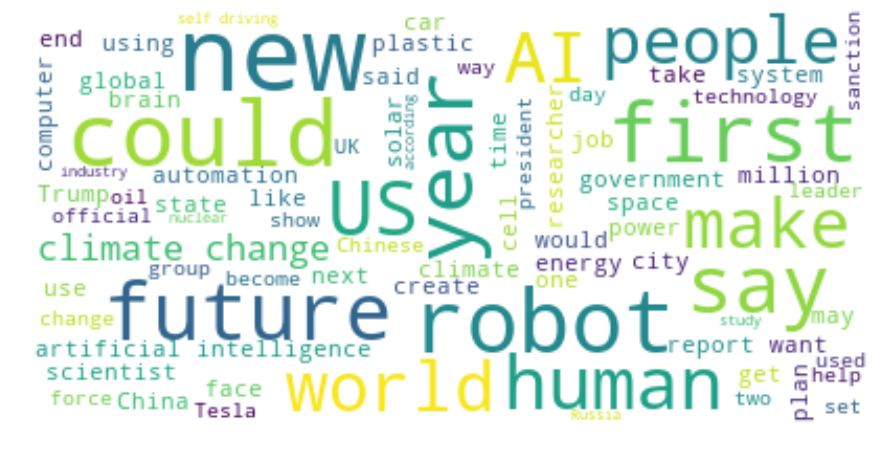

In [49]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=80, background_color="white").generate(df_string)



plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("")
plt.show()

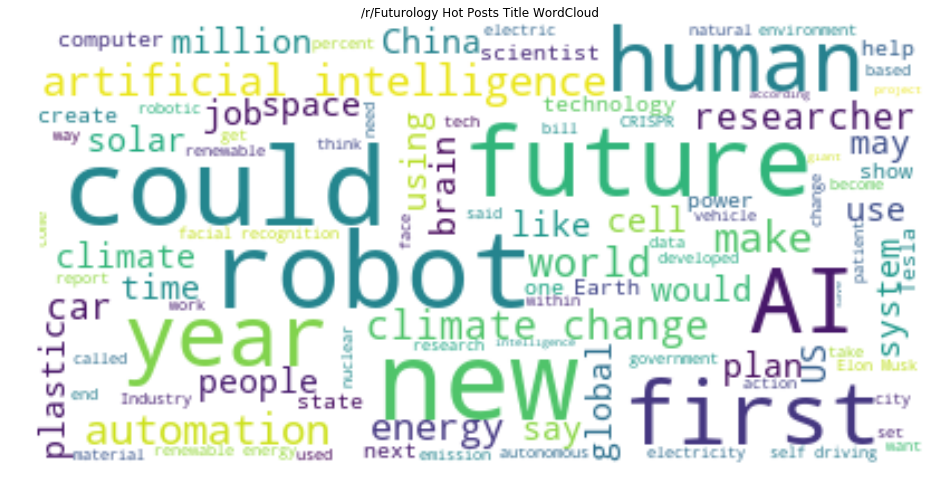

In [50]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=100, background_color="white").generate(future_df_string)



plt.figure(figsize = (16, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Futurology Hot Posts Title WordCloud")
plt.show()

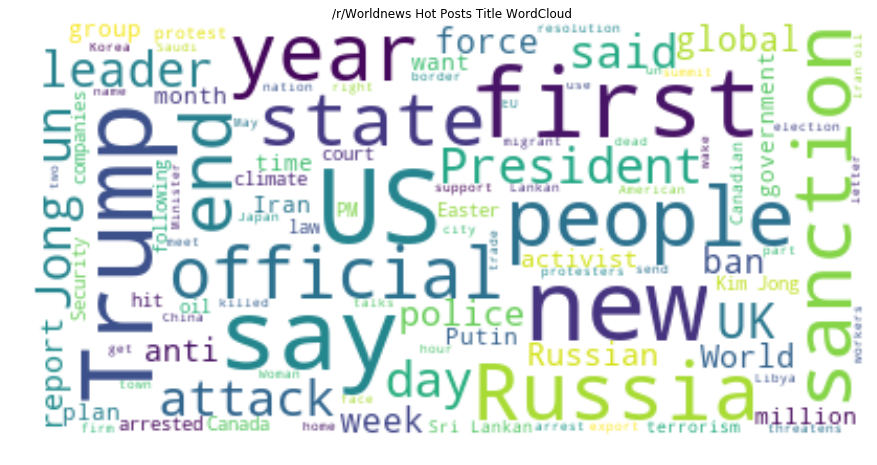

In [51]:
wordcloud = WordCloud(stopwords = stopwords.words('english'), max_font_size=50, max_words=100, background_color="white").generate(world_df_string)


plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("/r/Worldnews Hot Posts Title WordCloud")

plt.show()